In [1]:
from hybrid_classifier import HybridClassifier


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Jordi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
import pandas as pd

In [3]:
classifier = HybridClassifier()

[nltk_data] Downloading package sentiwordnet to
[nltk_data]     C:\Users\Jordi\AppData\Roaming\nltk_data...
[nltk_data]   Package sentiwordnet is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\Jordi\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Jordi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [4]:
X_test = pd.read_csv('datasets/X_test_cleaned.csv')

In [5]:
from nltk.corpus import movie_reviews as mr
from random import shuffle, seed
seed(42)

documents = [(mr.raw(file_id), 1 if category == 'pos' else 0) for category in mr.categories() for file_id in mr.fileids(category)]
shuffle(documents)

df_train, df_test = documents[:1600], documents[1600:]
X_train = [item[0] for item in df_train]
y_train = [item[1] for item in df_train]

X_test = [item[0] for item in df_test]
y_test = [item[1] for item in df_test]

In [7]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np

def model_performance(true_labels, predicted_labels,classes):    
        conf_matrix = confusion_matrix(true_labels, predicted_labels)
        df_cm = pd.DataFrame(conf_matrix, index = classes, columns = classes)

        print('Accuracy:  {:2.2%} '.format(accuracy_score(true_labels, predicted_labels)))
        print('Precision: {:2.2%} '.format(precision_score(true_labels, predicted_labels, average = 'weighted')))
        print('Recall:    {:2.2%} '.format(recall_score(true_labels, predicted_labels, average = 'weighted')))
        print('F1 Score:  {:2.2%} '.format(f1_score(true_labels, predicted_labels, average = 'weighted')))   
        print("\n")
        print("Classification Report: \n",)
        print( classification_report(true_labels, predicted_labels))
        plt.figure(figsize=(5,5))
        sn.heatmap(df_cm, annot = True, fmt = ".3f", linewidths = .5, square = True)
        plt.ylabel('Actual label')
        plt.xlabel('Predicted label')
        print("\nConfusion matrix:")
        score = accuracy_score(true_labels, predicted_labels)
        all_sample_title = 'Accuracy Score: {0}%'.format(np.round(score,4)*100)
        plt.title(all_sample_title, size = 12)

Accuracy:  84.00% 
Precision: 84.00% 
Recall:    84.00% 
F1 Score:  84.00% 


Classification Report: 

              precision    recall  f1-score   support

           0       0.83      0.84      0.84       198
           1       0.84      0.84      0.84       202

    accuracy                           0.84       400
   macro avg       0.84      0.84      0.84       400
weighted avg       0.84      0.84      0.84       400


Confusion matrix:


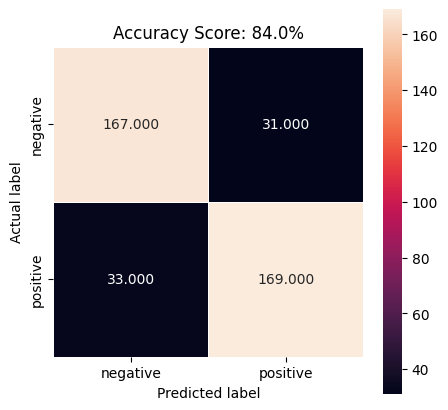

In [8]:
model_performance(true_labels = y_test, predicted_labels = pred, 
                                  classes=['negative', 'positive'])